<a href="https://colab.research.google.com/github/15JoldersmaT/Drowsiness_Detection/blob/main/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from PIL import Image
import os



In [97]:
#Prepare images

#Change to the location of your images
path = "C:/Users/15Jol/Downloads/sleep/TrainingSet/TrainingSet/Closed"
dirs = os.listdir( path )

filenamesO = []
filenamesC = []

def load_images_from_folder(folder, closedB):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            if closedB == True:
                filenamesC.append(filename)
            else:
                filenamesO.append(filename)
    return images


# Load images from folders A and B
#Basically creating two list, A Closed, B Opened
images_A = load_images_from_folder('C:/Users/15Jol/Downloads/sleep/TrainingSet/TrainingSet/Closed', True)  # replace with actual path
images_B = load_images_from_folder('C:/Users/15Jol/Downloads/sleep/TrainingSet/TrainingSet/Opened', False)  # replace with actual path

#Make the images the same size
def preprocess_images(images, dimensions=(64, 64)):
    return [img.resize(dimensions) for img in images]

images_A = preprocess_images(images_A)
images_B = preprocess_images(images_B)


#Create list of closed and opened eyes

opened_eyes = []
closed_eyes = []
count = 0


print (filenamesC)
print (filenamesO)
print ('Closed size:' + str(len(filenamesC)))
print ('Opened size:' + str(len(filenamesO)))
#Shows balanced dataset

['10065.jpg', '10074.jpg', '10111.jpg', '1017.jpg', '10259.jpg', '10288.jpg', '10301.jpg', '10329.jpg', '10464.jpg', '10511.jpg', '10515.jpg', '10528.jpg', '10672.jpg', '10677.jpg', '10715.jpg', '10729.jpg', '10869.jpg', '10881.jpg', '10891.jpg', '10897.jpg', '10934.jpg', '11154.jpg', '11169.jpg', '11185.jpg', '11219.jpg', '11344.jpg', '11379.jpg', '11380.jpg', '11554.jpg', '11584.jpg', '11632.jpg', '11752.jpg', '11791.jpg', '11794.jpg', '11812.jpg', '1211.jpg', '12248.jpg', '12302.jpg', '1239.jpg', '12511.jpg', '12512.jpg', '12513.jpg', '12515.jpg', '12728.jpg', '12843.jpg', '12857.jpg', '12879.jpg', '12936.jpg', '13233.jpg', '13340.jpg', '13350.jpg', '13384.jpg', '13426.jpg', '13433.jpg', '13436.jpg', '13553.jpg', '13590.jpg', '13624.jpg', '13626.jpg', '13634.jpg', '13742.jpg', '13781.jpg', '13815.jpg', '14014.jpg', '14161.jpg', '14206.jpg', '14217.jpg', '1429.jpg', '14366.jpg', '14372.jpg', '14607.jpg', '14639.jpg', '14821.jpg', '14940.jpg', '14951.jpg', '14996.jpg', '15096.jpg', '1

In [116]:
#Data prep

import pandas as pd
import json
import ast
from sklearn.preprocessing import StandardScaler

#Load dataset

# Initialize an empty list to store iris sizes
features = []

for file in os.listdir('C:/Users/15Jol/Downloads/sleep/TrainingSet_json/TrainingSet_json'):
    if file.endswith('.json'):

        #Create an entry for the features dictionary
        entry = {'FileName': file, 'Iris_Size': 0.0, 'Pupil_Size': 0.0, 'Look_Vec' : (0.0,0.0,0.0), 'Light_Intensity': 0.0 ,'HP': (0.0,0.0,0.0), 'Closed': file in filenamesC}

        full_path = os.path.join('C:/Users/15Jol/Downloads/sleep/TrainingSet_json/TrainingSet_json/', file)

        try:
            # Open and read the file
            with open(full_path, 'r') as f:
                data = json.load(f)

            # Extract the details and add it to the list
            iris_size = data.get('eye_details', {}).get('iris_size', None)
            pupil_size = data.get('eye_details', {}).get('pupil_size', None)
            look_vec = data.get('eye_details', {}).get('look_vec', None)

            light_intensity = data.get('lighting_details', {}).get('light_intensity', None)
            hp = data['head_pose']



            #print (Look_Vec)
            #Add the features to the list
            entry['Iris_Size'] = float(iris_size)
            entry['Pupil_Size'] = float(pupil_size)
            lvt = ast.literal_eval(look_vec)
            entry['Look_Vec'] = lvt
            entry['Light_Intensity'] = float(light_intensity)
            hpt = ast.literal_eval(hp)
            entry['HP'] = hpt


            #remove extension for comparing between image and json files
            file = file.split(".")[0]
            updatedFileNamesC = []

            for i in range(len(filenamesC)):
                if filenamesC[i].split(".")[0] == file:
                  #Again, stripping off extensions for comparing
                  updatedFileNamesC.append(filenamesC[i].split(".")[0])

            if file in updatedFileNamesC:
                entry['Closed'] = True
            else:
                entry['Closed'] = False

        except json.JSONDecodeError:
            print(f"Error decoding JSON in file: {file}")
        except FileNotFoundError:
            print(f"File not found: {file}")
        except Exception as e:
            print(f"An error occurred with file {file}: {e}")

        #Add Entry to list
        features.append(entry)




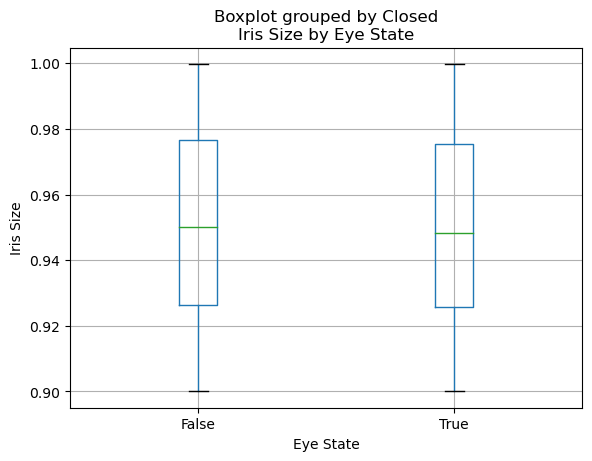

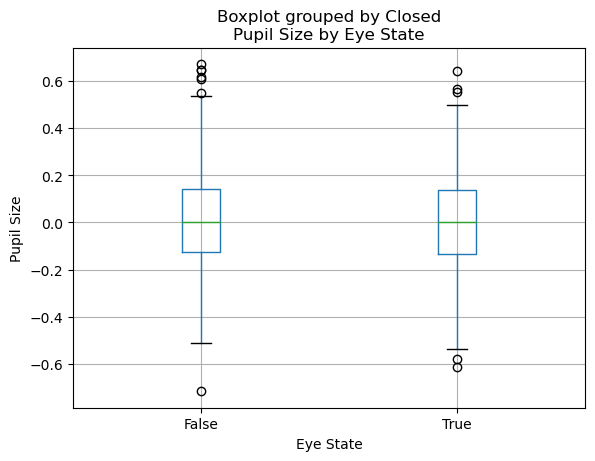

        FileName  Iris_Size  Pupil_Size                          Look_Vec  \
0     10065.json   0.919215   -0.579508  (-0.1954, -0.5547, -0.8088, 0.0)   
1     10074.json   0.990112    0.017440  (-0.1697, -0.2753, -0.9463, 0.0)   
2     10106.json   0.943240   -0.018512   (0.4519, -0.1173, -0.8843, 0.0)   
3     10111.json   0.975522   -0.243546  (-0.3751, -0.2053, -0.9039, 0.0)   
4     10112.json   0.934669   -0.217454   (-0.8383, 0.2743, -0.4711, 0.0)   
...          ...        ...         ...                               ...   
1699   9919.json   0.986777    0.004831     (0.567, 0.4348, -0.6996, 0.0)   
1700   9925.json   0.925274    0.233110    (-0.4726, 0.5907, -0.654, 0.0)   
1701   9926.json   0.964558    0.222212  (-0.7904, -0.5687, -0.2277, 0.0)   
1702   9931.json   0.983188   -0.158164   (0.4517, -0.0449, -0.8911, 0.0)   
1703   9934.json   0.902685   -0.068088   (0.5037, -0.5365, -0.6771, 0.0)   

      Light_Intensity                         HP  Closed  
0            0.7

In [117]:
#Visualizing the dataset a bit

import matplotlib.pyplot as plt


# Standardizing function
def standardize(df):
    for column in df.columns:
        try:
            mean = df[column].astype(float).mean()
            std = df[column].astype(float).std()
            df[column] = (df[column].astype(float) - mean) / std
        except ValueError:  # will catch exception when conversion to float is not possible
            print(f"Could not standardize column {column}, possibly because it contains non-numeric data.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    return df

# Standardize DataFrame --EXAMPLE--
# standardized_df = standardize(df)
# print(standardized_df)


df = pd.DataFrame(features)

# Function to standardize a single value
def standardize_value(x, mean, std):
    try:
        if isinstance(x, tuple):
            return tuple((float(ele) - mean) / std for ele in x)
        else:
            return (float(x) - mean) / std
    except ValueError:
        return x  # skip the value if it can't be converted to float

# Function to standardize a whole column
def standardize_column(col):
    mean = 0
    std = 1
    try:
        if column != 'Closed':
          numeric_values = pd.to_numeric(col.apply(pd.Series).stack(), errors='coerce').unstack()
          mean = numeric_values.mean().mean()
          std = numeric_values.std().mean()
        else:
          print('Do nothing')
    except:
        mean = 0
        std = 1


    return col.apply(lambda x: standardize_value(x, mean, std))

# Plotting
# Box plot
df.boxplot(column='Iris_Size', by='Closed')

plt.title('Iris Size by Eye State')
plt.xlabel('Eye State')
plt.ylabel('Iris Size')
plt.show()


df.boxplot(column='Pupil_Size', by='Closed')
plt.title('Pupil Size by Eye State')
plt.xlabel('Eye State')
plt.ylabel('Pupil Size')
plt.show()

print (df)



#Remember, False indicates the eyes are NOT closed

        FileName  Iris_Size  Pupil_Size  \
0     10065.json  -1.096935   -2.923700   
1     10074.json   1.381752    0.063991   
2     10106.json  -0.256986   -0.115949   
3     10111.json   0.871657   -1.242229   
4     10112.json  -0.556630   -1.111644   
...          ...        ...         ...   
1699   9919.json   1.265152    0.000881   
1700   9925.json  -0.885075    1.143406   
1701   9926.json   0.488326    1.088859   
1702   9931.json   1.139658   -0.814897   
1703   9934.json  -1.674819   -0.364075   

                                               Look_Vec  Light_Intensity  \
0     (0.30578602129744753, -1.2420892422737493, -2....        -1.003235   
1     (0.41650239834665365, -0.03842559450922832, -2...        -0.078564   
2     (3.094373992657413, 0.6422431826804434, -2.662...        -1.423830   
3     (-0.4683670119999198, 0.2631365219672085, -2.7...         1.295769   
4     (-2.463846617026857, 2.329267822854339, -0.881...        -0.120829   
...                        

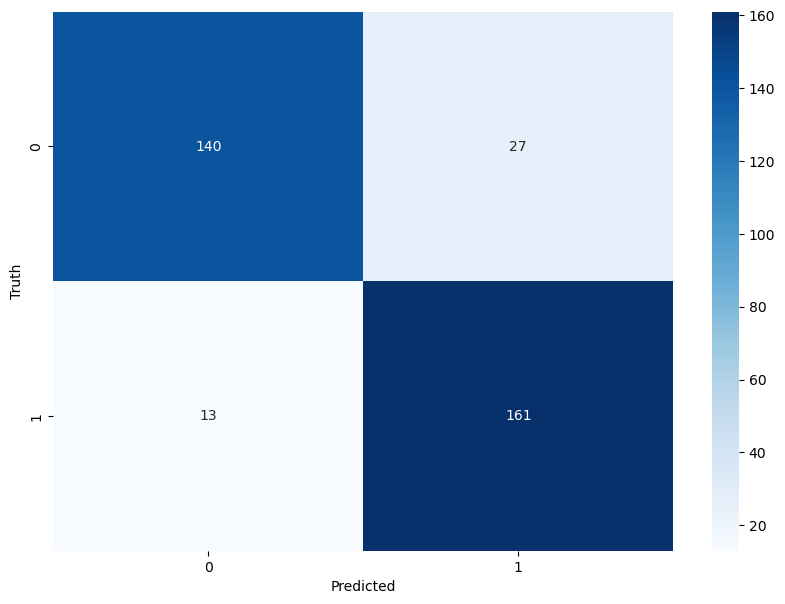

In [120]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import ast

#Some feature engineering
df['P-I'] = df['Iris_Size'] / df['Pupil_Size']

#Look Vector
df['LVX'] = df['Look_Vec'].apply(lambda x: float(x[0]))
df['LVY'] = df['Look_Vec'].apply(lambda x: float(x[1]))
df['LVZ'] = df['Look_Vec'].apply(lambda x: float(x[2]))

#Head pose
df['HPX'] = df['HP'].apply(lambda x: float(x[0]))
df['HPY'] = df['HP'].apply(lambda x: float(x[1]))
df['HPZ'] = df['HP'].apply(lambda x: float(x[2]))

print (df)

# Standardize DataFrame
for column in df.columns:
    df[column] = standardize_column(df[column])

#print(df)


#increase max iterations to help with model convergence
clf = LogisticRegression(max_iter=500)

#Splitting the dataset into training and testing sets, use random state for testing
x_train, x_test, y_train, y_test = train_test_split(df[['Iris_Size', 'Pupil_Size', 'Light_Intensity' ,'P-I', 'LVX', 'LVY', 'LVZ', 'HPX', 'HPY', 'HPZ']], df['Closed'], test_size=0.2, random_state=42)

#Fit
clf.fit(x_train, y_train)

#Predict
y_pred = clf.predict(x_test)

#Confusion Matrix for model analysis
cm = confusion_matrix(y_test, y_pred)

#Analyzing the results of our Logistic Regression Model
precision_score = sklearn.metrics.precision_score(y_test, y_pred)
recall_score = sklearn.metrics.recall_score(y_test, y_pred)

print ('Precision :', precision_score)
print ('Recall :' , recall_score)


#Decision_Function = clf.decision_function(x_test)
#print('Output of Decision Function is:', Decision_Function)
#print('Prediction for x_test from classifier is:', y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



Precision : 0.8316326530612245
Recall : 0.9367816091954023


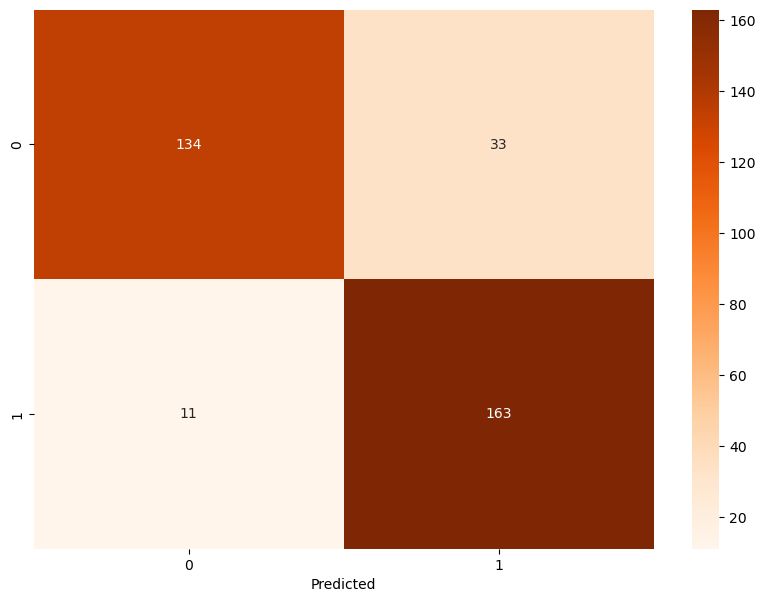

In [121]:
#Experiment with support vector machines
from sklearn import svm

clf = svm.SVC()

clf.fit(x_train, y_train)
clf.decision_function(x_test)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')

#Decision_Function = clf.decision_function(x_test)
#print('Output of Decision Function is:', Decision_Function)

#print('Prediction for x_test from classifier is:', y_pred)
#Analyzing the results of our Logistic Regression Model
precision_score = sklearn.metrics.precision_score(y_test, y_pred)
recall_score = sklearn.metrics.recall_score(y_test, y_pred)

print ('Precision :', precision_score)
print ('Recall :' , recall_score)